## Mini Project III

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/Users/kamininayyar/Downloads/mini-project-III/twm_accounts.csv", sep=';')
df.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [3]:
df1 = pd.read_csv("/Users/kamininayyar/Downloads/mini-project-III/twm_customer.csv", sep=';')
df1

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [4]:
df1.isnull().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [5]:
round(100*(df1.isnull().sum()/len(df1)),2)

cust_id            0.0
income             0.0
age                0.0
years_with_bank    0.0
nbr_children       0.0
gender             0.0
marital_status     0.0
name_prefix        0.0
first_name         0.0
last_name          0.0
street_nbr         0.0
street_name        0.0
postal_code        0.0
city_name          0.0
state_code         0.0
dtype: float64

In [6]:
df1.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [7]:
import numpy as np

In [8]:
cols_missing_vals = ['nbr_children','income', 'age', 'cust_id'] # cols with inappropriate 0s
(df1[cols_missing_vals] == 0).sum() 

nbr_children    466
income          102
age               0
cust_id           0
dtype: int64

df1[cols_missing_vals] = df1[cols_missing_vals].replace(0, np.NaN) # replace 0's with NaNs
df1.isnull().sum()
round(100*(df1.isnull().sum()/len(df1)),2)

In [9]:
#Binning with q-cut (bin according to quantiles)
binned_age= pd.cut(df1['age'], bins = 4).value_counts()
binned_age

(12.924, 32.0]    248
(32.0, 51.0]      244
(51.0, 70.0]      197
(70.0, 89.0]       58
Name: age, dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df1))

#summary statistics after scaling
scaled.describe()

In [11]:
df1['income']

0      26150
1       6605
2      18548
3      47668
4      44554
       ...  
742    14795
743    26387
744    61300
745    15100
746    17875
Name: income, Length: 747, dtype: int64

scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df1))

In [13]:
from sklearn.datasets import load_linnerud
from sklearn.cluster import KMeans   #<---- We will use sci-kit learns implementation of K-means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk')
sns.set(style='whitegrid', context='talk')

scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df1))

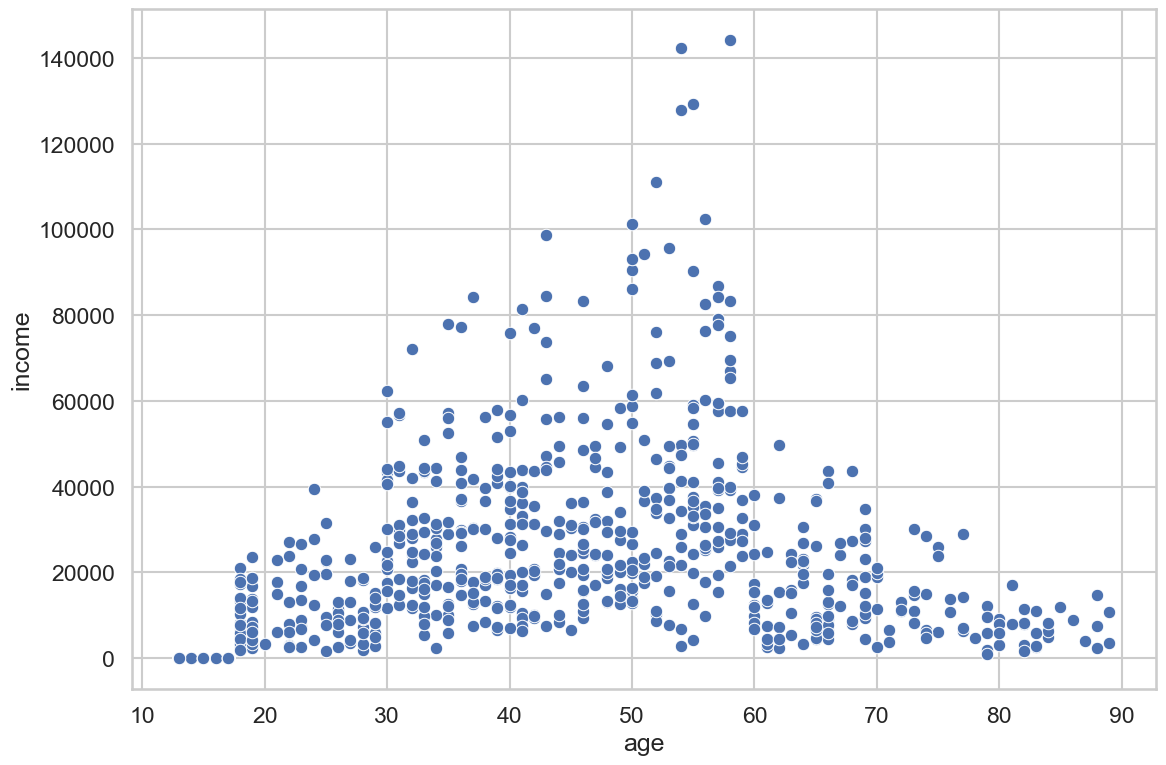

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=df1['age'], y=df1['income'], data=df1, ax=ax)

fig.tight_layout()

In [16]:
model = KMeans(2)

In [17]:
model.fit(df1[['age', 'income']])

KMeans(n_clusters=2)

In [18]:
y_pred = model.predict(df1[['age', 'income']])
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,

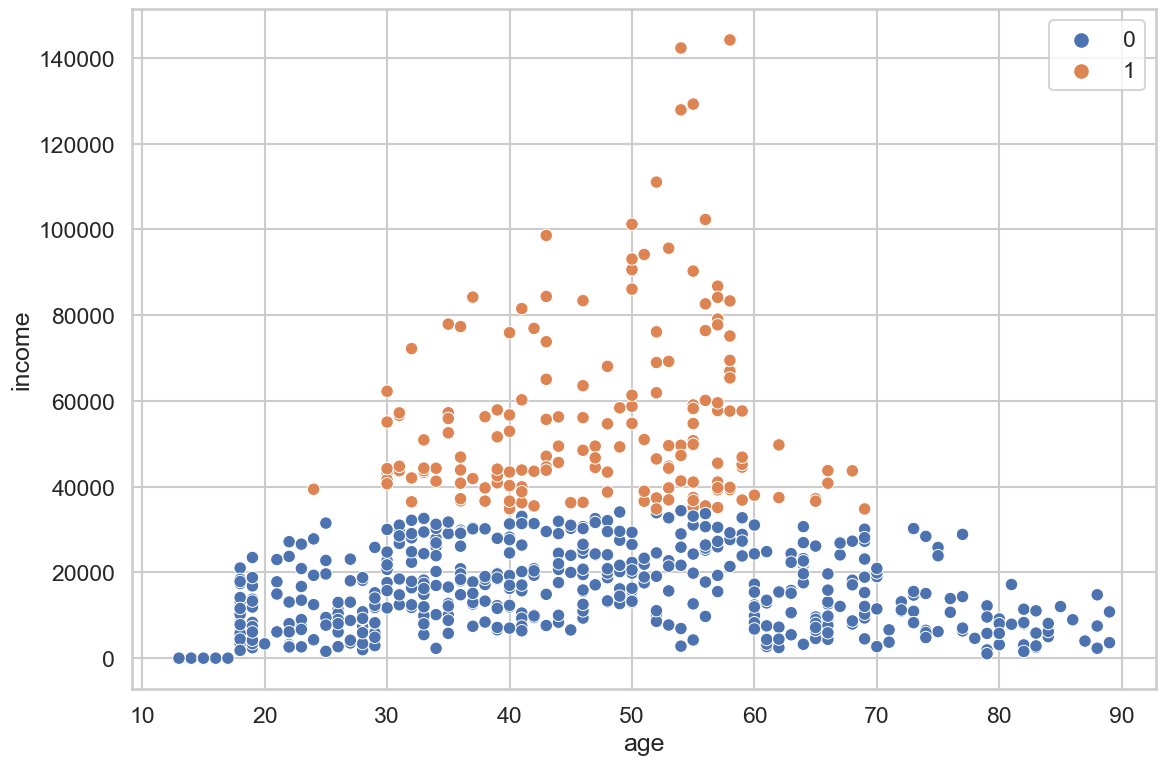

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=df1['age'], y=df1['income'], hue=y_pred, data=df1, ax=ax)

fig.tight_layout()